
## Loading explanations and comparing groups

The fifty observations in the validation data with the highest and lowest predicted GPAs were given "explanations" using the LIME algorithm. These explanations are contained in a dictionary which I load here, along with two files containing the indices and the predicted values. I also load another file that contains the names and descriptions of each variable.

Inspection of these explanations should illustrate the features the model is using to determine whether respondents have high or low GPA scores.

In [193]:
import pickle
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (9,6)
%config InlineBackend.figure_format = 'retina'
plt.rc('pdf', fonttype=42)
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True
plt.rcParams['font.serif'] = 'Times'
plt.rcParams['font.family'] = 'serif'

In [ ]:
exp = pickle.load(open('updated_lime_explanations.p','rb'))

In [4]:
exp

{3: [('f1i1_8.0 <= 0.00', 0.019260600964589199),
  ('hv3b1_1.0 <= 0.00', 0.013269125912319484),
  ('m1j2b > 0.56', -0.010119821029095416),
  ('m2b13b_3.0 <= 0.00', -0.0098325076113420402),
  ('m4d7 > 0.63', 0.0094918357478152877)],
 5: [('m4a13_8.0 <= 0.00', 0.089990995212514455),
  ('hv3cwtalone_0.0 <= 0.00', 0.066909580631638335),
  ('m2f2d1_12.0 <= 0.00', 0.018530056744309787),
  ('m2g1b_104.0 <= 0.00', 0.012908730828108539),
  ('0.00 < f4j25b1_3.0 <= 1.00', -0.0080361331626897254)],
 16: [('hv4v6b_1.0 <= 0.00', 0.024869987526413184),
  ('k5b1b_4.0 <= 0.00', 0.020869188864004198),
  ('f3k13p_6.0 <= 0.00', 0.017199616850527417),
  ('p5h17b_2.0 <= 0.00', -0.010704681424889707),
  ('f5a6a_1.0 > 0.00', 0.009190304184931504)],
 18: [('m2g5a8_1.0 <= 0.00', 0.05945583263851778),
  ('hv4r10a_3_1.0 <= 0.00', 0.056157552235171382),
  ('o5a3_3.0 <= 0.00', 0.042680345795655661),
  ('k5d1c_3.0 <= 0.00', 0.015619664957320126),
  ('0.00 < hv4l11_1.0 <= 1.00', -0.0084312646298517011)],
 28: [('m3c1

Now that the data have been loaded I first do some basic analysis to see the range of variables that are present in the explanations.

First I convert the explanations to a dictionary, which is an easier format to process than that returned by LIME. I then convert them to a pandas dataframe.

In [5]:
explanations = {}
for k,v in exp.items():
    user_exp = {}
    for x in v:
        user_exp[x[0]] = x[1]
    explanations[k] = user_exp

We can inspect a given element of the dictionary to see the explanation for a particular observation. For example the sub-dictionary below contains the explanation for observation 15. The keys in this dictionary are a combination of variables and values. For example the first key `f3d3a_5_1.0 <= 0.00` denotes the variable `f3d3a_5`, corresponding to the question posted to the father of the child in year 3 of the survey: "Who could you trust: child's sibling?". The second part of the key denotes that the response category `1.0` was less than or equal to `0`. Looking this up in the [survey documentation](https://fragilefamilies.princeton.edu/sites/fragilefamilies/files/ff_dad_cb3.txt) indicates that `1.0` indicates an answer of `Yes` to the question. While this syntax is somewhat confusing it indicates that this particular dummy variable had a value of 0 for this respondent. This therefore indicates that the child's rather did not answer yes to this particular question. The value of this element of the dictionary is a local coefficient generated by LIME that indicates the weight that this variable contributed to the local prediction. In this case the predictor was positive.



I now convert this dictionary into a pandas dataframe.

In [6]:
df = pd.DataFrame.from_dict(explanations, orient='index')

In [7]:
df.shape

(100, 475)

In [8]:
df.head()

,f1g9g_6.0 <= 0.00,m5e9_7_1.0 <= 0.00,f2k5_1.0 <= 0.00,p5j2g_2.0 <= 0.00,m3i0f_1.0 <= 0.00,hv3j19_3.0 <= 0.00,m2c3f_204.0 <= 0.00,f3b4h_2.0 > 0.00,m4h4_2.0 <= 0.00,k5g1b_2.0 <= 0.00,...,f1e4a_8.0 <= 0.00,f3d4_5.0 <= 0.00,k5e1c_1.0 <= 0.00,hv3c6a_3.0 <= 0.00,f2b38d_2.0 <= 0.00,f4h1q_0.0 <= 0.00,f2h7c_102.0 <= 0.00,p5i4_3.0 <= 0.00,0.00 < hv4c1e_4.0 <= 1.00,0.00 < m2k6_2.0 <= 1.00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, to get a sense of the important variables I can simplify the columns by extracting the variable names and creating a new dataframe. Apologies for the rather ugly code.

In [9]:
def extract_variable_name(s):
    """
    This function parses the column names in the explanations to extract the variable name
    from the FF survey.
    
    I have left in the comments to illustrate how the algorithm is working."""
    components = s.split()
    print(s)
    try: 
        float(components[0]) # if first component can be case to a float then var name in 2nd
        print('First component is a float')
        var = components[2]
        print('Name is in ', var)
    except ValueError:
        var = components[0]
        print('Name is in ', var)
        
    if '_' in var:
        subcomponents = var.split('_')
        if var.count('_') == 1:
            # if substring after the _ can't be cast to float then it is part of the name
            try:
                float(subcomponents[1])
                varname = subcomponents[0]
            except ValueError:
                varname = var
        elif var.count('_') > 1:
            print("More than one underscore in ", var)
            varname = subcomponents[0]+'_'+subcomponents[1]
            print("Variable name is ", varname)
            
    else:
        varname = var
    print(varname)
    return varname 

explanations_2 = {}
for k,v in explanations.items():
    user_exp = {}
    for x, v in v.items():
        var = extract_variable_name(x)
        user_exp[var] = v
    explanations_2[k] = user_exp
    
df_names = pd.DataFrame.from_dict(explanations_2, orient='index')

f1g9g_6.0 <= 0.00
Name is in  f1g9g_6.0
f1g9g
m5e9_7_1.0 <= 0.00
Name is in  m5e9_7_1.0
More than one underscore in  m5e9_7_1.0
Variable name is  m5e9_7
m5e9_7
f2k5_1.0 <= 0.00
Name is in  f2k5_1.0
f2k5
p5j2g_2.0 <= 0.00
Name is in  p5j2g_2.0
p5j2g
m3i0f_1.0 <= 0.00
Name is in  m3i0f_1.0
m3i0f
hv3j19_3.0 <= 0.00
Name is in  hv3j19_3.0
hv3j19
m2c3f_204.0 <= 0.00
Name is in  m2c3f_204.0
m2c3f
f3b4h_2.0 > 0.00
Name is in  f3b4h_2.0
f3b4h
m4h4_2.0 <= 0.00
Name is in  m4h4_2.0
m4h4
k5g1b_2.0 <= 0.00
Name is in  k5g1b_2.0
k5g1b
m3i21_3.0 <= 0.00
Name is in  m3i21_3.0
m3i21
p5q3bb1_3.0 <= 0.00
Name is in  p5q3bb1_3.0
p5q3bb1
hv4a24_1.0 <= 0.00
Name is in  hv4a24_1.0
hv4a24
cf5marm_1.0 <= 0.00
Name is in  cf5marm_1.0
cf5marm
f4i0m4_2.0 <= 0.00
Name is in  f4i0m4_2.0
f4i0m4
m4b3_20.0 <= 0.00
Name is in  m4b3_20.0
m4b3
m2h9a3_103.0 <= 0.00
Name is in  m2h9a3_103.0
m2h9a3
p5q3g_3.0 <= 0.00
Name is in  p5q3g_3.0
p5q3g
cf1edu_3.0 > 0.00
Name is in  cf1edu_3.0
cf1edu
0.11 < m2k16 <= 1.13
First compo

Name is in  hv3v2_1.0
hv3v2
hv3j9_1.0 <= 0.00
Name is in  hv3j9_1.0
hv3j9
hv3c6a_2.0 <= 0.00
Name is in  hv3c6a_2.0
hv3c6a
m5f4b_1.0 > 0.00
Name is in  m5f4b_1.0
m5f4b
m2j4b3_2.0 <= 0.00
Name is in  m2j4b3_2.0
m2j4b3
hv4b24_2.0 <= 0.00
Name is in  hv4b24_2.0
hv4b24
f3f2d3_2.0 <= 0.00
Name is in  f3f2d3_2.0
f3f2d3
p5q3ba_3.0 <= 0.00
Name is in  p5q3ba_3.0
p5q3ba
hv3b1_0.0 <= 0.00
Name is in  hv3b1_0.0
hv3b1
p5j9 > 0.19
Name is in  p5j9
p5j9
p5h15c_18.0 <= 0.00
Name is in  p5h15c_18.0
p5h15c
p5q3cg_3.0 <= 0.00
Name is in  p5q3cg_3.0
p5q3cg
m4f2d4_15.0 <= 0.00
Name is in  m4f2d4_15.0
m4f2d4
f4i23p3_4.0 <= 0.00
Name is in  f4i23p3_4.0
f4i23p3
m5i4_2.0 <= 0.00
Name is in  m5i4_2.0
m5i4
f1f7_101.0 <= 0.00
Name is in  f1f7_101.0
f1f7
hv3j23h_3.0 <= 0.00
Name is in  hv3j23h_3.0
hv3j23h
hv3k1c_5.0 <= 0.00
Name is in  hv3k1c_5.0
hv3k1c
0.00 < f1i1_4.0 <= 1.00
First component is a float
Name is in  f1i1_4.0
f1i1
hv4food_exp > 0.38
Name is in  hv4food_exp
hv4food_exp
hv4g13_7.0 <= 0.00
Name is in 

In [10]:
df_names.shape

(100, 419)

In [11]:
names = list(df_names.columns)

In [44]:
df_names.head()

,f1g9g,m5e9_7,f2k5,p5j2g,m3i0f,hv3j19,m2c3f,f3b4h,m4h4,k5g1b,...,m3j18a,m2c23c,f1e4a,f3d4,k5e1c,f2b38d,f4h1q,p5i4,hv4c1e,m2k6
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Also defining a new dataframe and a function to count the number of observations each variable occurs in:

In [53]:
df_names_counts = df_names.notnull()*1

def count_occurrences(var):
    return df_names_counts[var].sum()

In [54]:
count_occurrences('m4h4')

1

# Getting variable metadata

To get metadata for these variables there are a number of different steps. During the challenge, participant Connor Gilroy created a meta-data csv file that contains some information on each variable; since the challenge the Fragile Families team have built an API to programmatically get metadata. I mostly rely on the API below but use Gilroy's csv when metadata is not available.


Loading Gilroy's file:

In [13]:
meta = pd.read_csv('ffc_variable_types.csv')
meta.index = meta['variable']
del meta['variable']

Copying over [code](https://github.com/fragilefamilieschallenge/ffmetadata-py/blob/master/ff.py) from the challenge github.

In [14]:
"""============================================================================
Python wrapper for the Fragile Families Metadata API.
Examples
--------
>>> import ff
>>> data = ff.select('cm1relf')
>>> data = ff.filter(responses='sometimes')
>>> data = ff.search('age', 'label')
============================================================================"""

import requests

# -----------------------------------------------------------------------------

BASE_URL = 'http://api.fragilefamiliesmetadata.org'


# -----------------------------------------------------------------------------

def select(var_name, field_name=None):
    """Returns dictionary of metadata for variable `var_name`. Provided an
    optional `field_name`, return only data for the specified field.
    """
    params = {'varName': var_name}
    if field_name:
        params['fieldName'] = field_name
    return _get('select', params)


# -----------------------------------------------------------------------------

def filter(**kwargs):
    """Return a list of variables where each field name matches the provided
    value.
    """
    params = dict(kwargs)
    return _get('filter', params)['matches']


# -----------------------------------------------------------------------------

def search(query, field_name):
    """Return a list of variables where `query` is found in `field_name`.
    """
    params = {'query': query, 'fieldName': field_name}
    return _get('search', params)['matches']


# -----------------------------------------------------------------------------

def _get(endpoint, params):
    """Return JSON as dictionary based on endpoint and query parameters.
    """
    url = '%s/%s' % (BASE_URL, endpoint)
    url = requests.Request('GET', url, params=params).prepare().url
    response = requests.get(url)
    if response.status_code == 500:
        raise ConnectionError(response.reason)
    json = response.json()
    if 'error code' in json:
        raise AttributeError(json['error_description'])
    return json

The names of some of the variables used in the challenge have changed so they cannot be found in the API. This section creates a dictionary mapping the old names to the new names. Note that some variables from the challenge are not in the metadata so may still fail to be found.

In [247]:
# Getting the raw metadata file and creating a name conversion dictionary
url = "http://browse.fragilefamiliesmetadata.org/get_metadata"
df = pd.read_csv(url, encoding="latin1")
old_name_to_new_name = {}
for _, r in df.iterrows():
  old_name_to_new_name[r['old_name']] = r['new_name']

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123,125,127,129,131,133) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


It turns out that some of the variables have been renamed multiple times and cannot easily be found in the metadata, either in the new API or in Connor Gilroy's file. After discussion on Github it appears that almost all of these come from the in-house survey. The following function can be used to convert these to get names that can be used to get metadata from the new API.

In [16]:
def convertToNew(var):
    """Takes an old variable name from the in house survey and converts it to a new one."""
    chars = [x for x in string.ascii_lowercase]
    if not var.startswith('hv'):
        print("This variable does not start with hv")
        return
    else:
        var = var[2:] # Remove hv prefix
        if var[1] in chars[:14]: #if [a-n]
            return 'p'+var
        elif var[1] in chars[14:22]: #if [p-v]
            if var[2] in chars: # if next element is another character
                return 'ch'+var 
            else: # if not assign o prefix
                return 'o'+var

Now I can finally iterate through the names and get as much metadata as possible. The code before first checks the API for the raw variable name. If this fails it uses the dictionary to get the old name and then checks the API again. If this still fails it either uses the above function to get the new name (if the variable prefix is 'hv') or uses Gilroy's metadata. If either of these fail then it sets the metadata to None.

In [59]:
error = 0
meta_data = {}
count_by_new_name = {} # A dictionary mapping the new name to the number of observations var occurs in
for i in names:
    print(i)
    
    try:
        m = select(i)
        meta_data[i] = m
        count_by_new_name[i] = count_occurrences(i)
    except:
        try:
            n = old_name_to_new_name[i]
            m = select(n)
            meta_data[n] = m
            count_by_new_name[n] = count_occurrences(i)
        except:

            try:
                if i.startswith('hv'):
                    n = convertToNew(i)
                    m = select(n)
                    meta_data[n] = m
                    count_by_new_name[n] = count_occurrences(i)
                else:
                    meta_data[i] = meta.loc[i]
                    count_by_new_name[i] = count_occurrences(i)
            except:
                meta_data[i] = None
                count_by_new_name[i] = count_occurrences(i)

f1g9g
m5e9_7
f2k5
p5j2g
m3i0f
hv3j19
m2c3f
f3b4h
m4h4
k5g1b
m3i21
p5q3bb1
hv4a24
cf5marm
f4i0m4
m4b3
m2h9a3
p5q3g
cf1edu
m2k16
t5b3f
o5a8
f4i23p5
p5l3h
f2j22
m2b27
m2b18b
m3l4a
hv3j23b
m2citywt_rep8
m2h8g
cm3b_age
hv4l66
hv4b6
p5i1g
m5c1d
f4i23p2
m3b4m
p5j9
p5m3a
f4b6a
m4h1l
p5q3a
hv3v3
f2d2c
m4b4a2
m2b17f
k5a1a
m3b6a
hv4g21
f3r0a
f3c7b
f4d1g
t5e9d
hv4f1e
m3b23
m2b8
m1b15f
m2h2
hv4pvceil
hv4g1
f5b22c
f2k7a
hv4g23d
m2b18d
f2b36c
hv3a1
hv5_ppvtpr
hv4a30
hv3m34
hv4f2a1
m3d1f
f4b3
t5c12
m3d3
f1f6
hv3a6a
m1f11b
hv3j23e
hv3j2
hv4f1b
m2d2
o5g8_3
f3f2c1
f4h1p
f4b4b13
m4c36
f2b36f
hv4j1
f1b13
m2l2
f4a4
cm3kids
f1g9l
hv3m2
f3l3
m2k8a
hv3pvnbasal_m
t5e20
k5e1b
p5l18
hv4v6b
k5b1b
f3k13p
p5h17b
f5a6a
p5q3cn
m4i0n1
f4k10
p5i24
m5a51
t5b3c
cmf2finjail
hv3b3
m1g1
hv5_13
m3c30d
f4i22
m4c3g
f5i22
f3i20
m5j6b1
f3r10
m3a10
t5e17a
m5a2
t5f1a
m1e3e
f3b4e
m1c1a
m1f12
f1e1b1
f4c27
hv3j3
cm4b_age
f4k13
m4d7
m2a8e
m2c24a
hv3pvbasal_m
f2b37a
f1j6
f3b4m
hv4l22
m4c35b
k5a1c
hv4g6
hv4g23i
hv4ppvtage
f2b37e
m4c3e
f1

In [60]:
[x for x in meta_data.keys() if meta_data[x] is None]

['hv3c_c3', 'hv3r10a7', 'hv3cwtalone', 'hv4cflag', 'hv4agemos', 'hv4food_exp']

In [61]:
len(meta_data)

419

After running this procedure the metadata has been obtained for all but 8 of these variables. These are ignored in the analysis below.

Now to consider analysis to summarize the findings:

- Top K most frequently occuring values
- Histogram of relevant waves
- Histogram of respondents
- Histogram of topic / umbrella topic

In [62]:
from collections import defaultdict

# Top 25 most frequent

In [154]:
for i, j in sorted(count_by_new_name.items(), key=lambda x: x[1], reverse=True)[:62]:
    #print(meta_data[i]['label'], j)
    print(j)

5
4
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


62 variables of 419 appear in more than one explanation.

In [155]:
62/419

0.14797136038186157

# Waves

In [72]:
wave_count = defaultdict(int)
for k,v in meta_data.items():
    try:
        wave_count[v['wave']] += count_by_new_name[k]
    except:
        pass

In [177]:
#sorted(wave_count.items(), key=lambda x: x[1], reverse=True)

[('4', 129), ('3', 102), ('5', 101), ('2', 56), ('1', 34)]

In [73]:
sorted(wave_count.items(), key=lambda x: x[1], reverse=True)

[('4', 135), ('5', 128), ('3', 109), ('2', 73), ('1', 42)]

In [158]:
wave_count

defaultdict(int, {'1': 42, '2': 73, '3': 109, '4': 135, '5': 128})

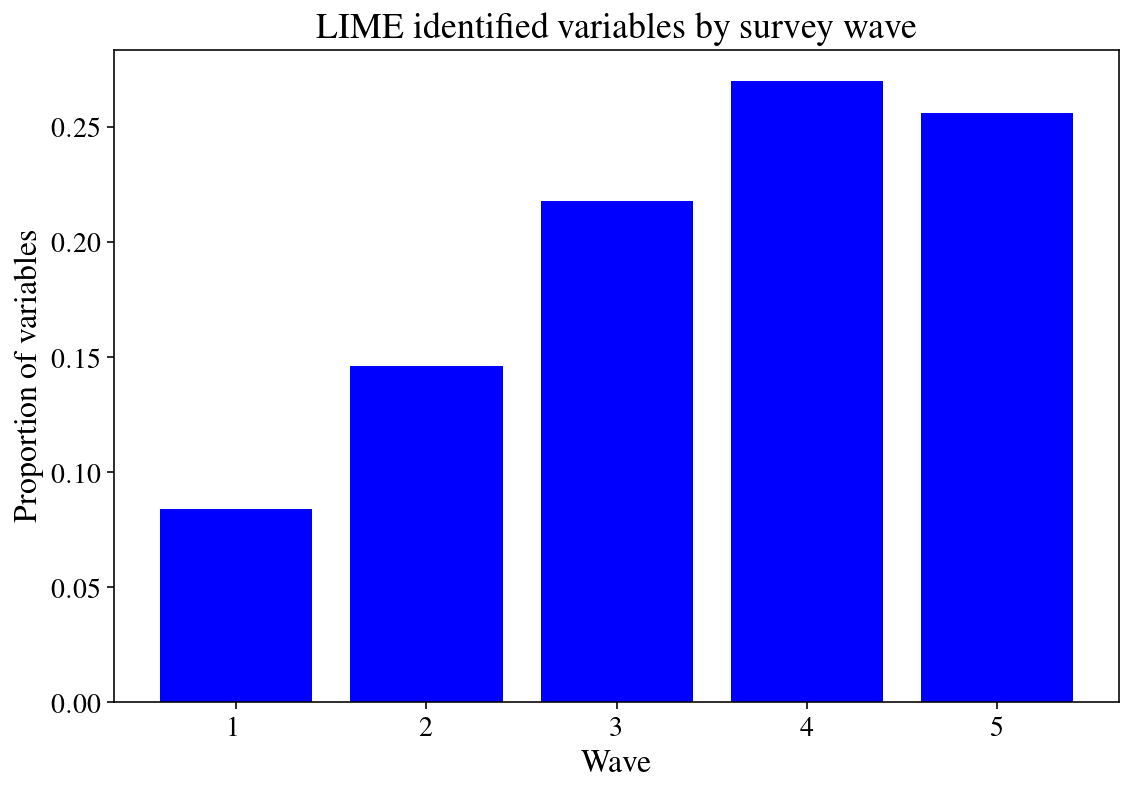

In [202]:
data = list(sorted(wave_count.items(), key=lambda x: x[0]))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, [x/500 for x in freq], color='b')
plt.xticks(indices, word, rotation='vertical')
plt.title('LIME identified variables by survey wave',size=18)
plt.ylabel('Proportion of variables',size=16)
plt.xlabel('Wave', size=16)
plt.xticks(size=14, rotation=360)
plt.yticks(size=14)
plt.show()

# Respondents

In [101]:
respondent_count = defaultdict(int)
for k,v in meta_data.items():
    try:
        respondent_count[v['respondent']] += count_by_new_name[k]
    except:
        pass

### Respondent codes
m = mother
f = father
p = primary caregiver
t = teacher
o = home (observation)
h = home (survey)
k = child
q = couple

In [188]:
respondent_map = {'m':'Mother',
                  'f': 'Father',
                 'p': 'Primary caregiver',
                 't': 'Teacher',
                 'o': 'Home (Observation)',
                 'h': 'Home (Survey)',
                 'k': 'Child',
                 'q': 'Couple'}

In [189]:
respondent_count_ = {}
for k,v in respondent_count.items():
    respondent_count_[respondent_map[k]] = v

In [190]:
sorted(respondent_count_.items(), key=lambda x: x[1], reverse=True)

[('Mother', 157),
 ('Father', 135),
 ('Primary caregiver', 123),
 ('Teacher', 28),
 ('Home (Observation)', 17),
 ('Child', 14),
 ('Home (Survey)', 12),
 ('Couple', 1)]

(array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35]),
 <a list of 8 Text yticklabel objects>)

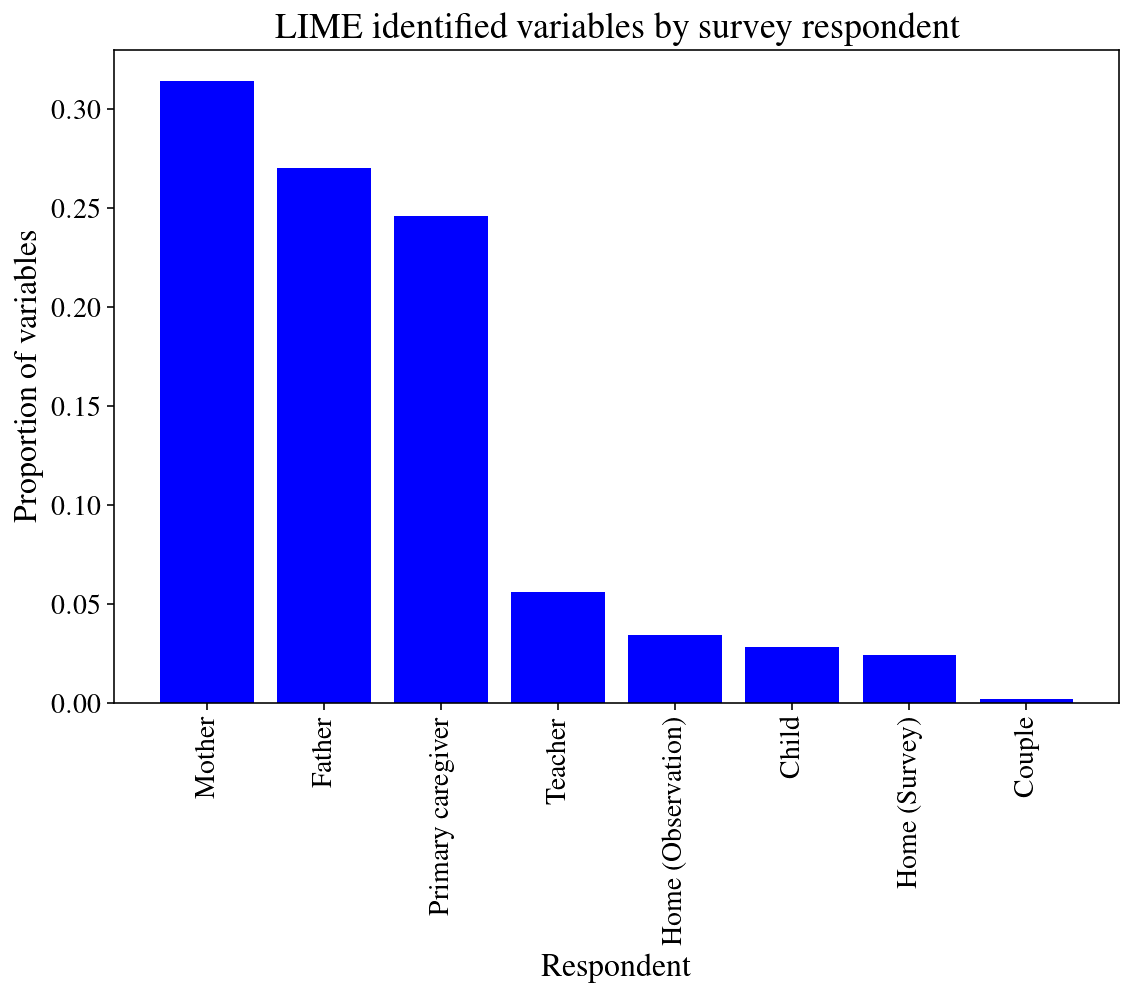

In [296]:
data = list(sorted(respondent_count_.items(), key=lambda x: x[1], reverse=True))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, [x/500 for x in freq], color='b')
plt.xticks(indices, word, rotation='vertical', size=14)
plt.title('LIME identified variables by survey respondent',size=18)
plt.ylabel('Proportion of variables',size=16)
plt.xlabel('Respondent', size=16)
plt.yticks(size=14)

# Topic

In [172]:
topic_count = defaultdict(int)
umbrella_count = defaultdict(int)
for k,v in meta_data.items():
    try:
        for t in v['topics']:
            topic_count[t['topic']] += count_by_new_name[k]
            if t['umbrella'] == 'Legal system':
                print(v['label'])
            umbrella_count[t['umbrella']] += count_by_new_name[k]
    except:
        pass

Constructed - mother and father reports, father in jail at either 1 yr interview
Is father currently working, in school, or unemployed?
Did you establish paternity at the hospital or through some other means?
Does father have primary custody of child?
Constructed - mother report, father in jail at mother five-year interview
Constructed - father report, father in jail at his 3yr interview


In [176]:
sorted(topic_count.items(), key=lambda x: x[1], reverse=True)

[('parenting behavior', 87),
 ('behavior', 65),
 ('household composition', 29),
 ('student experiences', 26),
 ('parenting abilities', 21),
 ('employment - traditional work', 20),
 ('public transfers and social services', 19),
 ('attitudes/expectations/happiness', 17),
 ('parental relationship quality', 15),
 ('mental health', 14),
 ('social support', 12),
 ('paradata', 12),
 ('neighborhood conditions', 11),
 ('expenses', 11),
 ('cognitive skills', 11),
 ('home environment', 11),
 ('health behavior', 10),
 ('fertility history', 10),
 ('physical health', 9),
 ('parental relationship status', 9),
 ('childcare services and availability', 9),
 ('educational attainment/achievement', 8),
 ('community participation', 7),
 ('child living arrangements', 7),
 ('housing status', 7),
 ('health care access and insurance', 7),
 ("parents' family background", 7),
 ('parent school involvement', 6),
 ('age', 6),
 ('grandparents', 6),
 ('household income/poverty', 6),
 ('parent-child contact', 5),
 ('pr

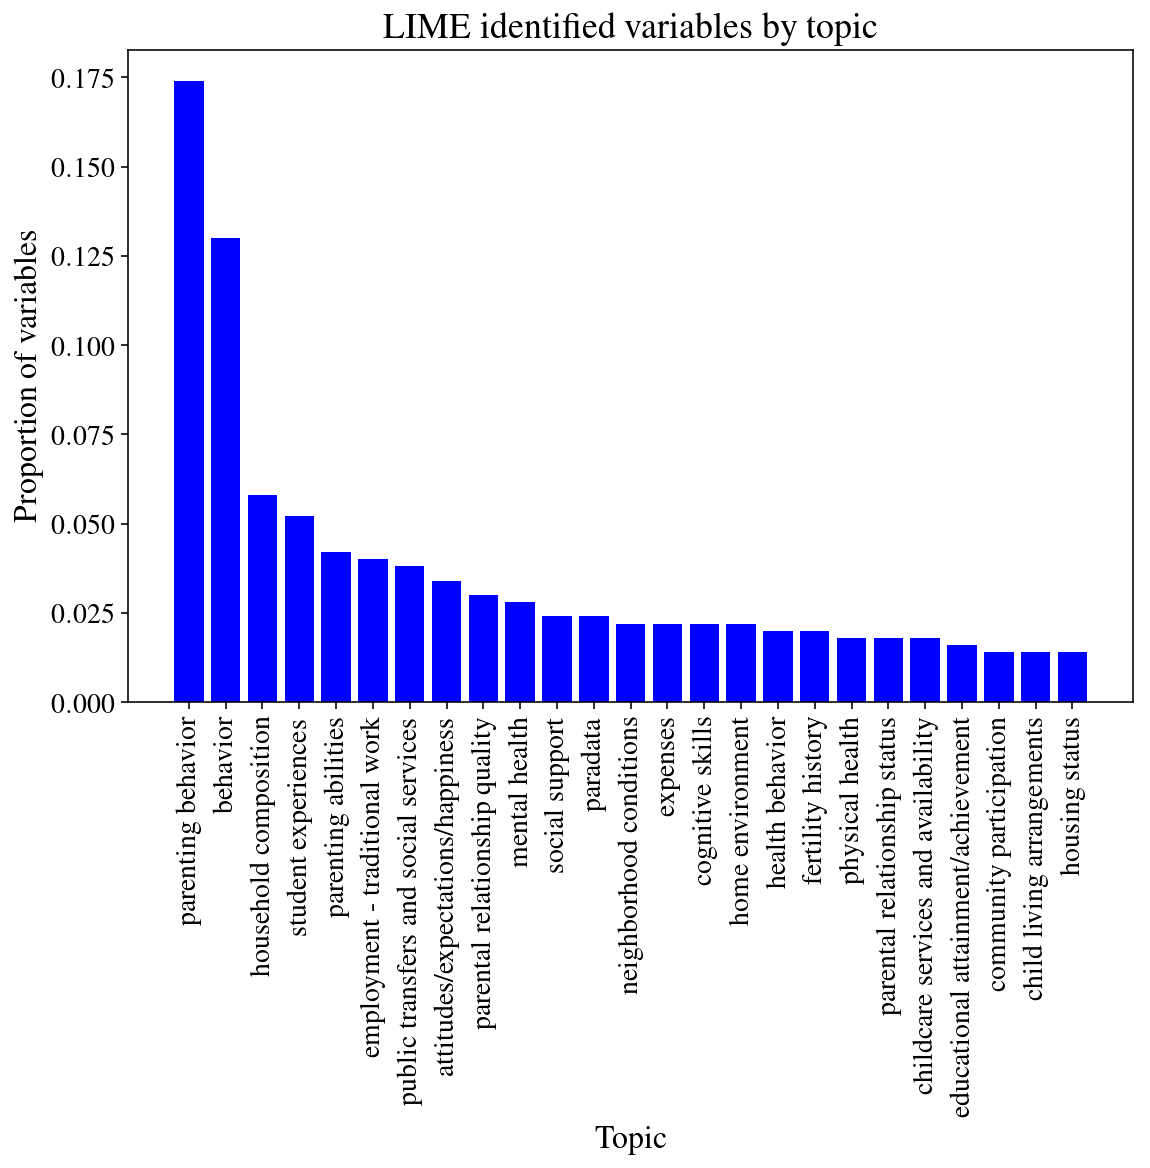

In [205]:
data = list(sorted(topic_count.items(), key=lambda x: x[1], reverse=True))[:25]
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, [x/500 for x in freq], color='b')
plt.xticks(indices, word, rotation='vertical',size=14)
plt.title('LIME identified variables by topic',size=18)
plt.ylabel('Proportion of variables',size=16)
plt.xlabel('Topic', size=16)
plt.yticks(size=14)
plt.show()

In [110]:
sorted(umbrella_count.items(), key=lambda x: x[1], reverse=True)

[('Parenting', 115),
 ('Cognitive and behavioral development', 76),
 ('Home and housing', 59),
 ('Finances', 58),
 ('Health and health behavior', 54),
 ('Education and school', 46),
 ('Parental relationships', 30),
 ('Family and social support', 25),
 ('Employment', 23),
 ('Community', 18),
 ('Attitudes and expectations', 17),
 ('Paradata and weights', 15),
 ('Childcare', 9),
 ('Demographics', 9),
 ('Legal system', 7)]

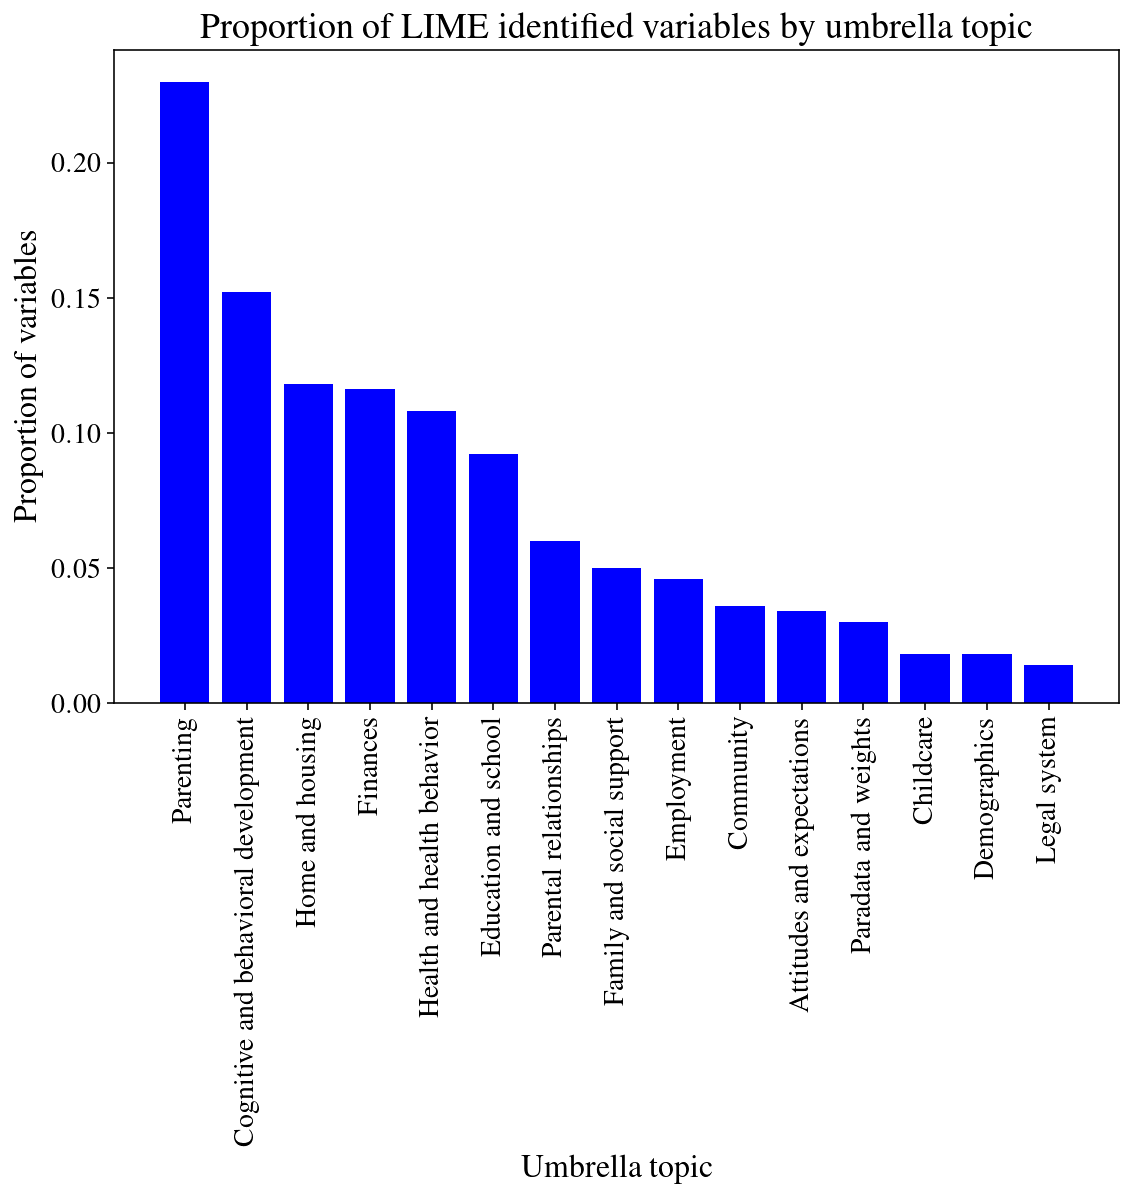

In [346]:
data = list(sorted(umbrella_count.items(), key=lambda x: x[1], reverse=True))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, [x/500 for x in freq], color='blue')
plt.xticks(indices, word, rotation='vertical',size=14)
plt.title('Proportion of LIME identified variables by umbrella topic',size=18)
plt.ylabel('Proportion of variables',size=16)
plt.xlabel('Umbrella topic', size=16)
plt.yticks(size=14)
plt.show()

#TODO: To ascertain whether these findings are interesting it is necessary to compare to the distribution of questions pertaining to each wave/respondent/topic in the entire dataset. This will allow me to see if any of the categories are disproportionately represented in these responses. e.g. does parental relationships and parenting occur at a higher rate here than in the overall survey? To do this properly it is also necessary to take into account the variables that were removed in the preprocessing stage: they will need to be excluded from the distribution.

,new_name,old_name,varlab,type,group,q_group_N,topic1,umbrella1,topic2,umbrella2,...,value54,label54,value55,label55,value56,label56,value57,label57,value58,label58
0,idnum,idnum,Encrypted family ID,ID Number,1,1,paradata,Paradata and weights,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cf1intmon,f1intmon,Father interview month,uc,3a,16,paradata,Paradata and weights,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cf1intyr,f1intyr,Father interview year,cont,3b,16,paradata,Paradata and weights,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cf1lenhr,f1lenhr,What was the total length of interview - Hours,cont,4a,2,paradata,Paradata and weights,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cf1lenmin,f1lenmin,What was the total length of interview - Minutes,cont,4b,4,paradata,Paradata and weights,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,cf1twoc,cf1twoc,Constructed - Two cities flag,bin,5,10,paradata,Paradata and weights,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,cf1fint,cf1fint,Constructed - Was father interviewed at baseline?,bin,6b,12,paradata,Paradata and weights,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,cf1natsm,cf1natsm,Constructed - Baseline national sample flag,bin,7b,13,paradata,Paradata and weights,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,f1natwt,f1natwt,Father baseline national weight,cont,0,1985,survey weights,Paradata and weights,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,cf1natsmx,cf1natsmx,Constructed - Baseline national sample flag (e...,bin,8,11,paradata,Paradata and weights,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding proportion of questions in each wave

In [248]:
df = df[df['wave'] != 6.0]

In [249]:
df = df[df['new_name'] != 'idnum']

In [250]:
from collections import Counter

In [283]:
wave_count_full = {}
for k,v in dict(Counter(list(df['wave']))).items():
    wave_count_full[str(int(k))] = v
wave_count_full

{'1': 845, '2': 1885, '3': 4830, '4': 3934, '5': 3863}

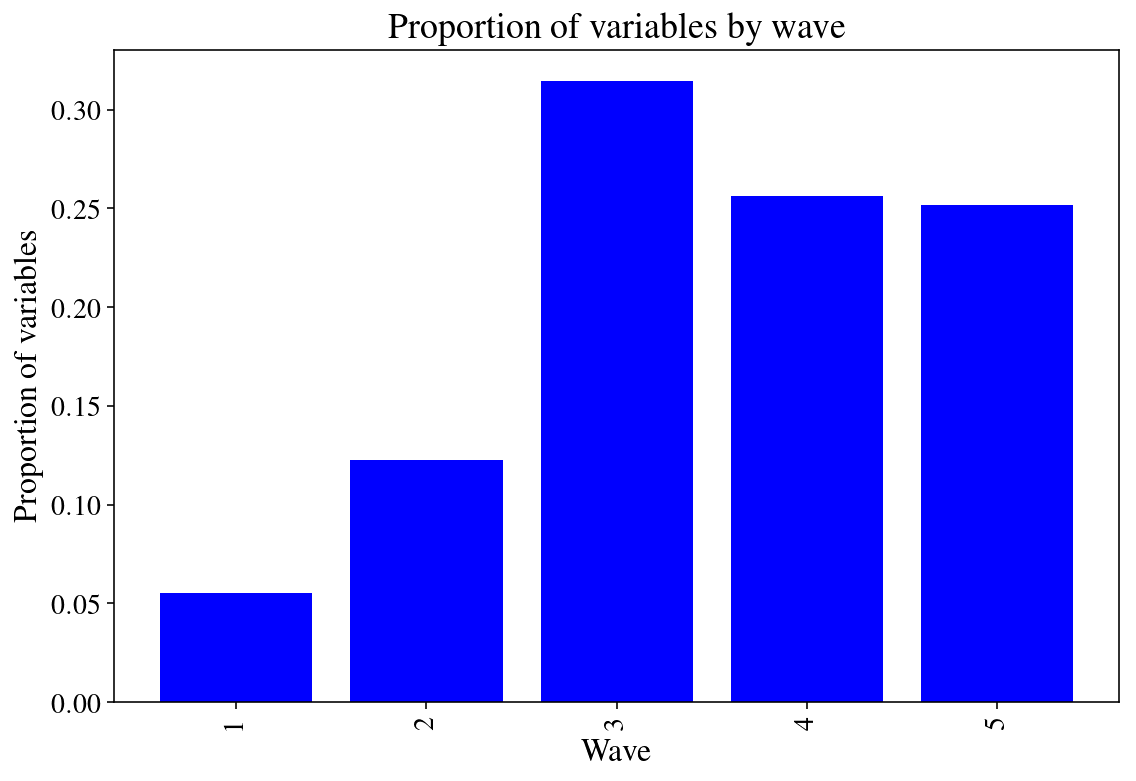

In [347]:
data = list(sorted(wave_count_full.items(), key=lambda x: x[0]))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, [x/df.shape[0] for x in freq], color='blue')
plt.xticks(indices, word, rotation='vertical',size=14)
plt.title('Proportion of variables by wave',size=18)
plt.ylabel('Proportion of variables',size=16)
plt.xlabel('Wave', size=16)
plt.yticks(size=14)
plt.show()

Now to take the difference between the proportion in my results and the proportion in the survey overall.

In [276]:
wave_count_full

{'1': 845, '2': 1885, '3': 4830, '4': 3934, '5': 3863}

In [278]:
wave_counts_mod = {}
for k,v in wave_count.items():
    prop_observed = v/500
    prop_in_survey = wave_count_full[k]/df.shape[0]
    wave_counts_mod[k] = prop_observed-prop_in_survey

In [280]:
wave_counts_mod

{'1': 0.028976232337045001,
 '2': 0.02325467213648498,
 '3': -0.096514553623754634,
 '4': 0.013830175164420144,
 '5': 0.0044534739858045347}

In [361]:
wsignif = {}
for k,v in wave_count.items():
    count = np.array([v, wave_count_full[k]])
    nobs = np.array([500, df.shape[0]])
    stat, pval = proportions_ztest(count, nobs)
    if pval > 0.05:
        wsignif[k] = ''
    elif pval <= 0.05 and pval > 0.01:
        wsignif[k] = '*'
    elif pval <= 0.01 and pval > 0.001:
        wsignif[k] = '**'
    elif pval <= 0.001:
        wsignif[k] = '***'

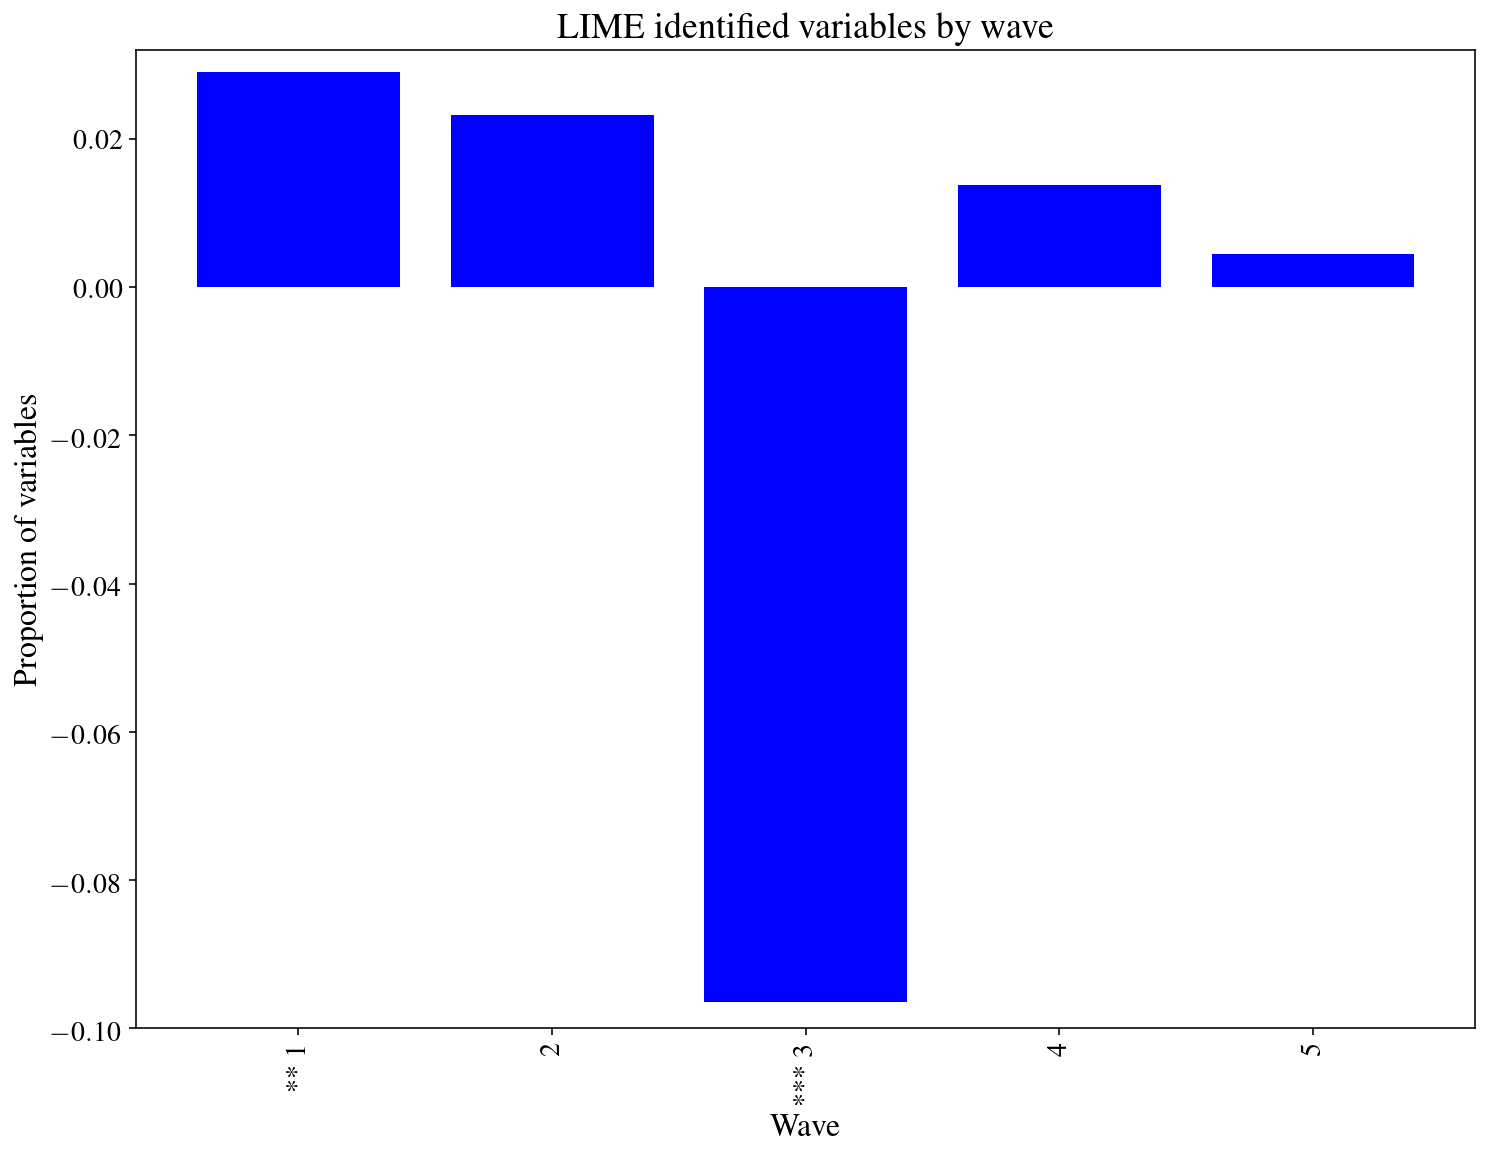

In [373]:
data = list(sorted(wave_counts_mod.items(), key=lambda x: x[0]))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, freq, color='blue')
plt.xticks(indices, [wsignif[x] + ' ' + x for x in word], rotation='vertical',size=14)
plt.title('LIME identified variables by wave',size=18)
plt.ylabel('Proportion of variables',size=16)
plt.xlabel('Wave', size=16)
plt.ylim(-0.10, 0.032)
plt.yticks(size=14)
plt.show()

Now to do the same for respondents:

In [285]:
resp_count_full = {}
for k,v in dict(Counter(list(df['respondent']))).items():
    resp_count_full[k] = v
resp_count_full

{'d': 422,
 'e': 60,
 'f': 4556,
 'h': 1598,
 'k': 483,
 'm': 4692,
 'n': 216,
 'o': 323,
 'p': 1703,
 'q': 370,
 'r': 407,
 's': 53,
 't': 415,
 'u': 59}

In [287]:
resp_count_full_restricted = {}
for k,v in resp_count_full.items():
    if respondent_map.get(k):
        resp_count_full_restricted[respondent_map[k]] = v

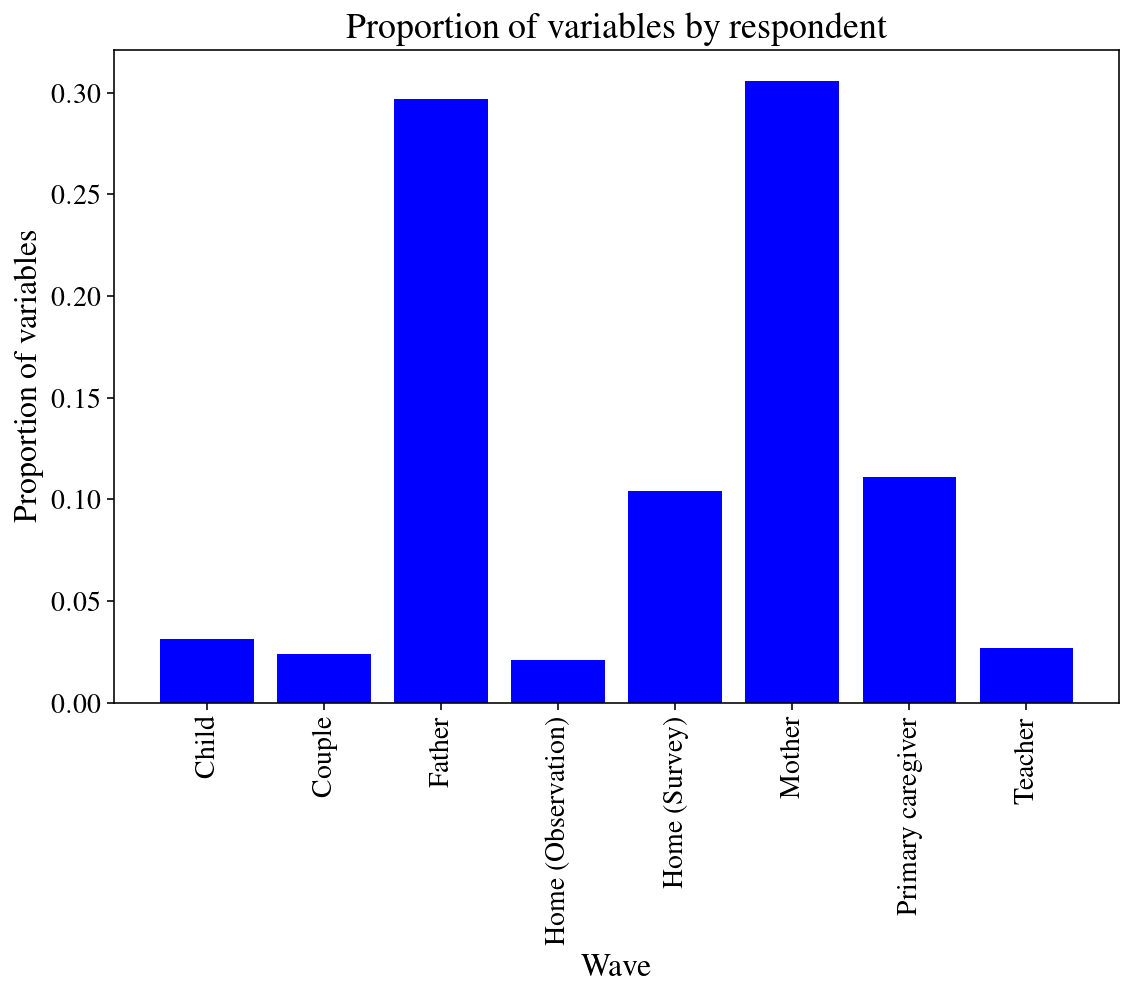

In [348]:
data = list(sorted(resp_count_full_restricted.items(), key=lambda x: x[0]))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, [x/df.shape[0] for x in freq], color='blue')
plt.xticks(indices, word, rotation='vertical',size=14)
plt.title('Proportion of variables by respondent',size=18)
plt.ylabel('Proportion of variables',size=16)
plt.xlabel('Wave', size=16)
plt.yticks(size=14)
plt.show()

In [310]:
resp_counts_mod = {}
for k,v in respondent_count_.items():
    prop_observed = v/500
    prop_in_survey = resp_count_full_restricted[k]/df.shape[0]
    resp_counts_mod[k] = prop_observed-prop_in_survey

In [292]:
resp_counts_mod

{'Child': -0.0034514553623754655,
 'Couple': -0.022093247379045389,
 'Father': -0.026672527186299366,
 'Home (Observation)': 0.012967246206941462,
 'Home (Survey)': -0.080056781923552783,
 'Mother': 0.0084715764797811954,
 'Primary caregiver': 0.13510594517158298,
 'Teacher': 0.028976492804584229}

In [352]:
rsignif = {}
for k,v in respondent_count_.items():
    count = np.array([v, resp_count_full_restricted[k]])
    nobs = np.array([500, df.shape[0]])
    stat, pval = proportions_ztest(count, nobs)
    if pval > 0.05:
        rsignif[k] = ''
    elif pval <= 0.05 and pval > 0.01:
        rsignif[k] = '*'
    elif pval <= 0.01 and pval > 0.001:
        rsignif[k] = '**'
    elif pval <= 0.001:
        rsignif[k] = '***'

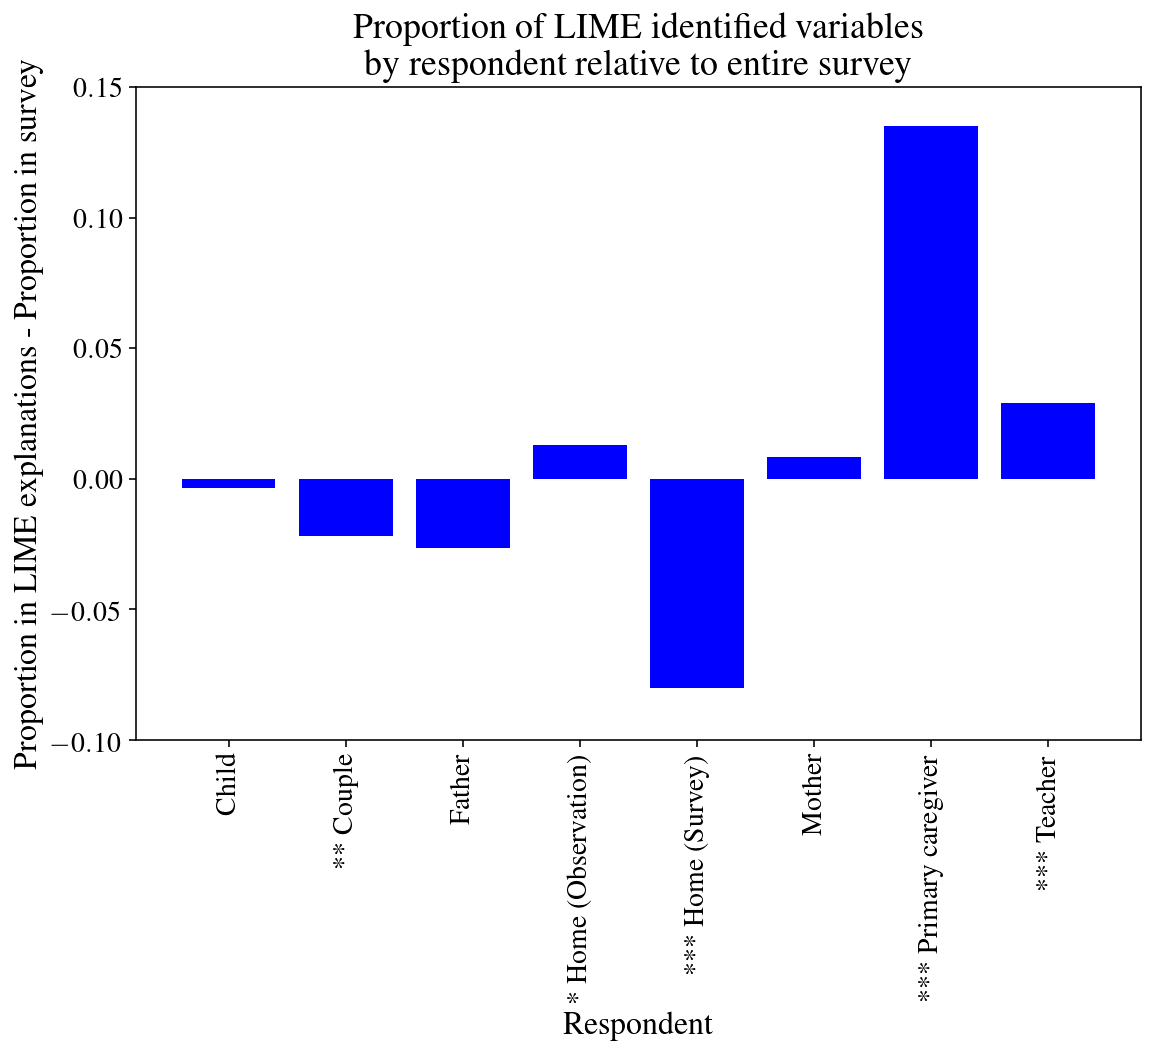

In [354]:
data = list(sorted(resp_counts_mod.items(), key=lambda x: x[0]))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, freq, color='blue')
plt.xticks(indices, [rsignif[x]+' '+ x for x in word], rotation='vertical',size=14)
plt.title('Proportion of LIME identified variables \n by respondent relative to entire survey',size=18)
plt.ylabel('Proportion in LIME explanations - Proportion in survey',size=16)
plt.xlabel('Respondent', size=16)
plt.yticks(size=14)
plt.ylim(-0.1,0.15)
plt.show()

Now getting the same for topic:

In [317]:

topic1_counts = Counter(list(df['topic1']))
topic2_counts = Counter(list(df['topic2']))
topic_counts_full = topic1_counts + topic2_counts
topic_count_full = {}
for k,v in dict(topic_counts_full).items():
    if isinstance(k, str):
        topic_count_full[k] = v

In [325]:
topic_counts_mod = {}
for k,v in topic_count.items():
    prop_observed = v/500
    prop_in_survey = topic_count_full[k]/df.shape[0]
    topic_counts_mod[k] = prop_observed-prop_in_survey

In [355]:
tsignif = {}
for k,v in topic_count.items():
    count = np.array([v, topic_count_full[k]])
    nobs = np.array([500, df.shape[0]])
    stat, pval = proportions_ztest(count, nobs)
    if pval > 0.05:
        tsignif[k] = ''
    elif pval <= 0.05 and pval > 0.01:
        tsignif[k] = '*'
    elif pval <= 0.01 and pval > 0.001:
        tsignif[k] = '**'
    elif pval <= 0.001:
        tsignif[k] = '***'

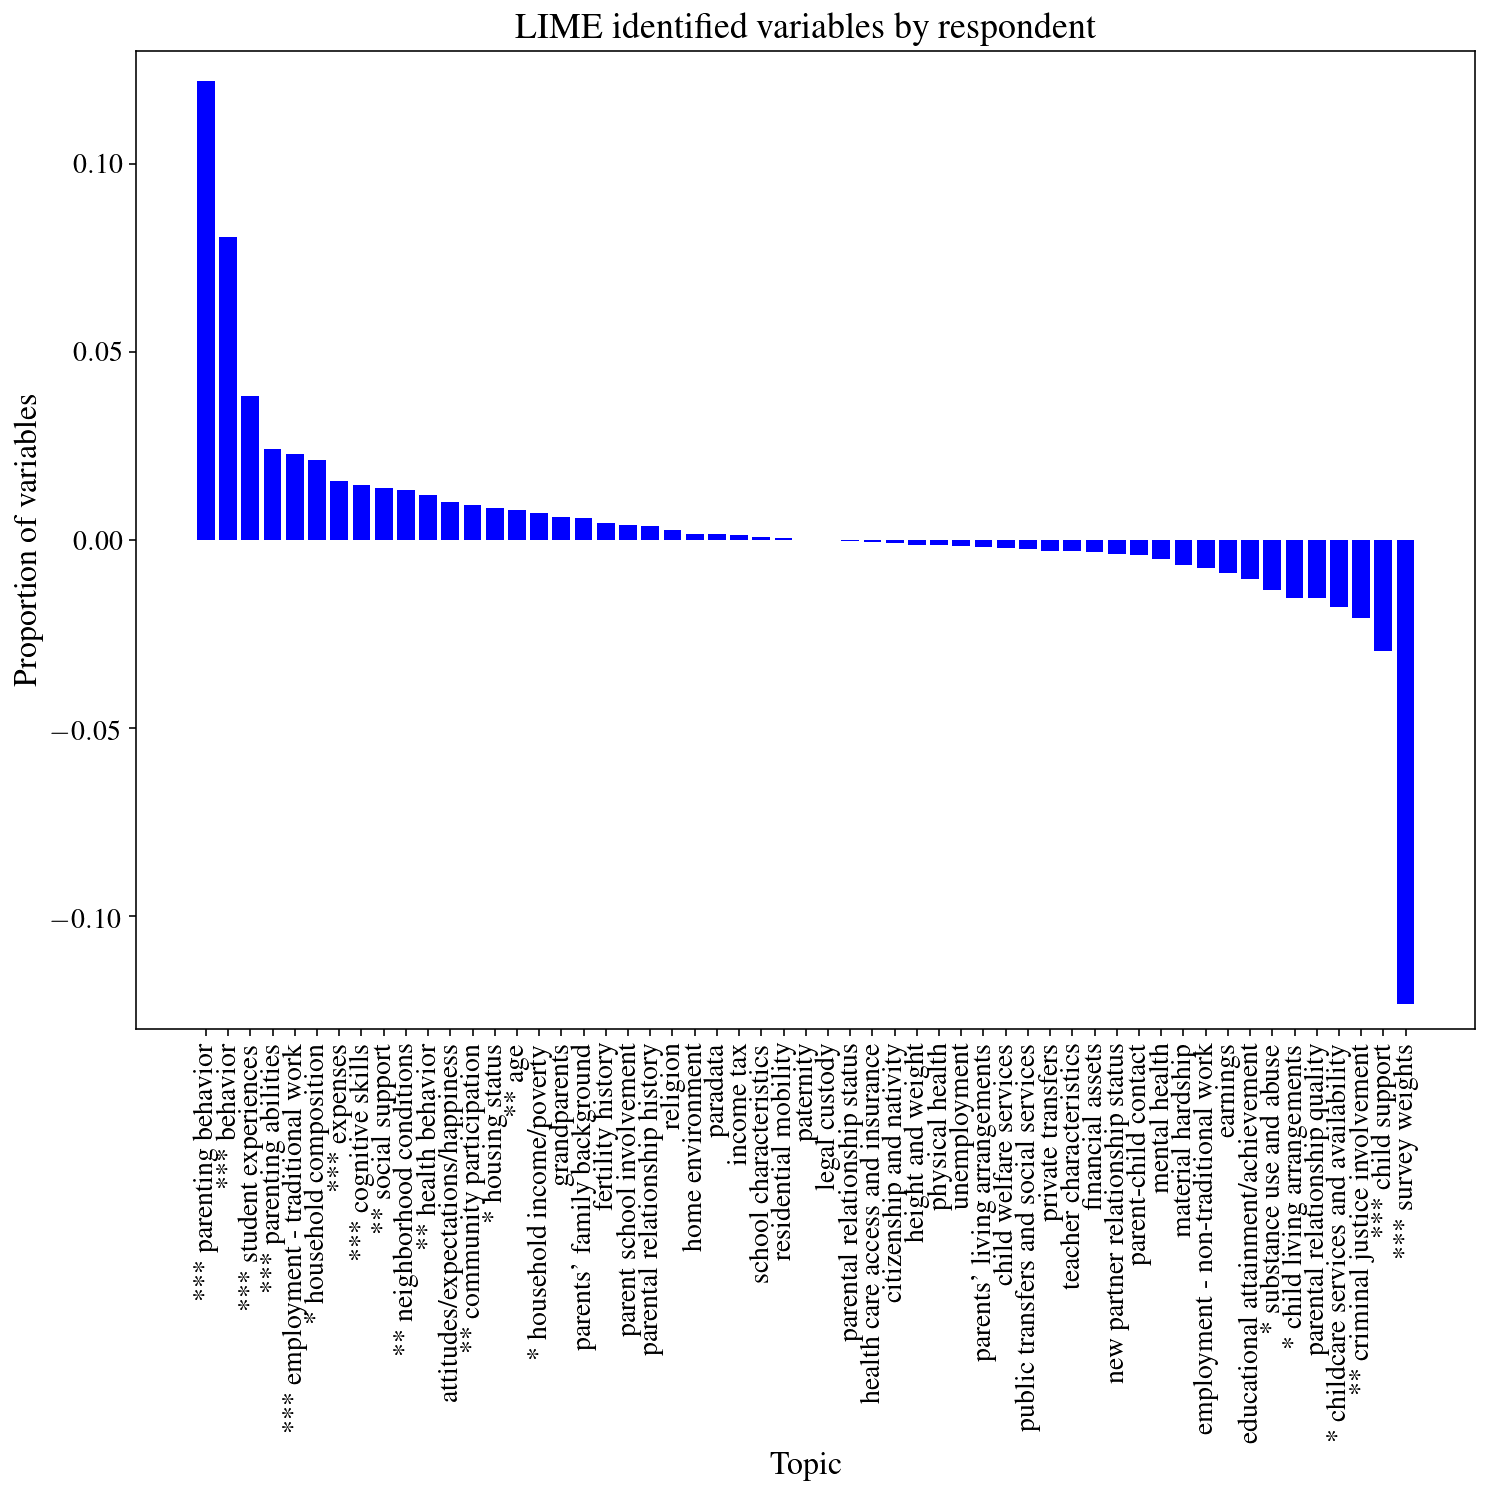

In [360]:
plt.rcParams["figure.figsize"] = (12,9)
data = list(sorted(topic_counts_mod.items(), key=lambda x: x[1], reverse=True))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, freq, color='blue')
plt.xticks(indices, [tsignif[x] + ' ' + x for x in word], rotation='vertical',size=14)
plt.title('LIME identified variables by respondent',size=18)
plt.ylabel('Proportion of variables',size=16)
plt.xlabel('Topic', size=16)
plt.yticks(size=14)
plt.ylim(-0.13,0.13)

plt.show()

Now finally to look at the main categories:

In [318]:

u1_counts = Counter(list(df['umbrella1']))
u2_counts = Counter(list(df['umbrella2']))
umbrella_counts_full = u1_counts + u2_counts
umbrella_count_full = {}
for k,v in dict(umbrella_counts_full).items():
    if isinstance(k, str):
        umbrella_count_full[k] = v

In [322]:
umbrella_counts_mod = {}
for k,v in umbrella_count.items():
    prop_observed = v/500
    prop_in_survey = umbrella_count_full[k]/df.shape[0]
    umbrella_counts_mod[k] = prop_observed-prop_in_survey
    

In [323]:
umbrella_counts_mod

{'Attitudes and expectations': 0.010167220160187538,
 'Childcare': -0.075638080354235845,
 'Cognitive and behavioral development': 0.095218076447222771,
 'Community': 0.022390571075079767,
 'Demographics': -0.0056374291853877739,
 'Education and school': 0.029097089275249066,
 'Employment': -0.051349742788305008,
 'Family and social support': 0.025776518851338154,
 'Finances': -0.029080419352738154,
 'Health and health behavior': -0.02868034121247641,
 'Home and housing': 0.014008334961255448,
 'Legal system': -0.021423585335677543,
 'Paradata and weights': -0.12178745848798594,
 'Parental relationships': -0.023414729439343626,
 'Parenting': 0.13968288077098392}

In [341]:
from statsmodels.stats.proportion import proportions_ztest
signif = {}
for k,v in umbrella_count.items():
    count = np.array([v, umbrella_count_full[k]])
    nobs = np.array([500, df.shape[0]])
    stat, pval = proportions_ztest(count, nobs)
    if pval > 0.05:
        signif[k] = ''
    elif pval <= 0.05 and pval > 0.01:
        signif[k] = '*'
    elif pval <= 0.01 and pval > 0.001:
        signif[k] = '**'
    elif pval <= 0.001:
        signif[k] = '***'

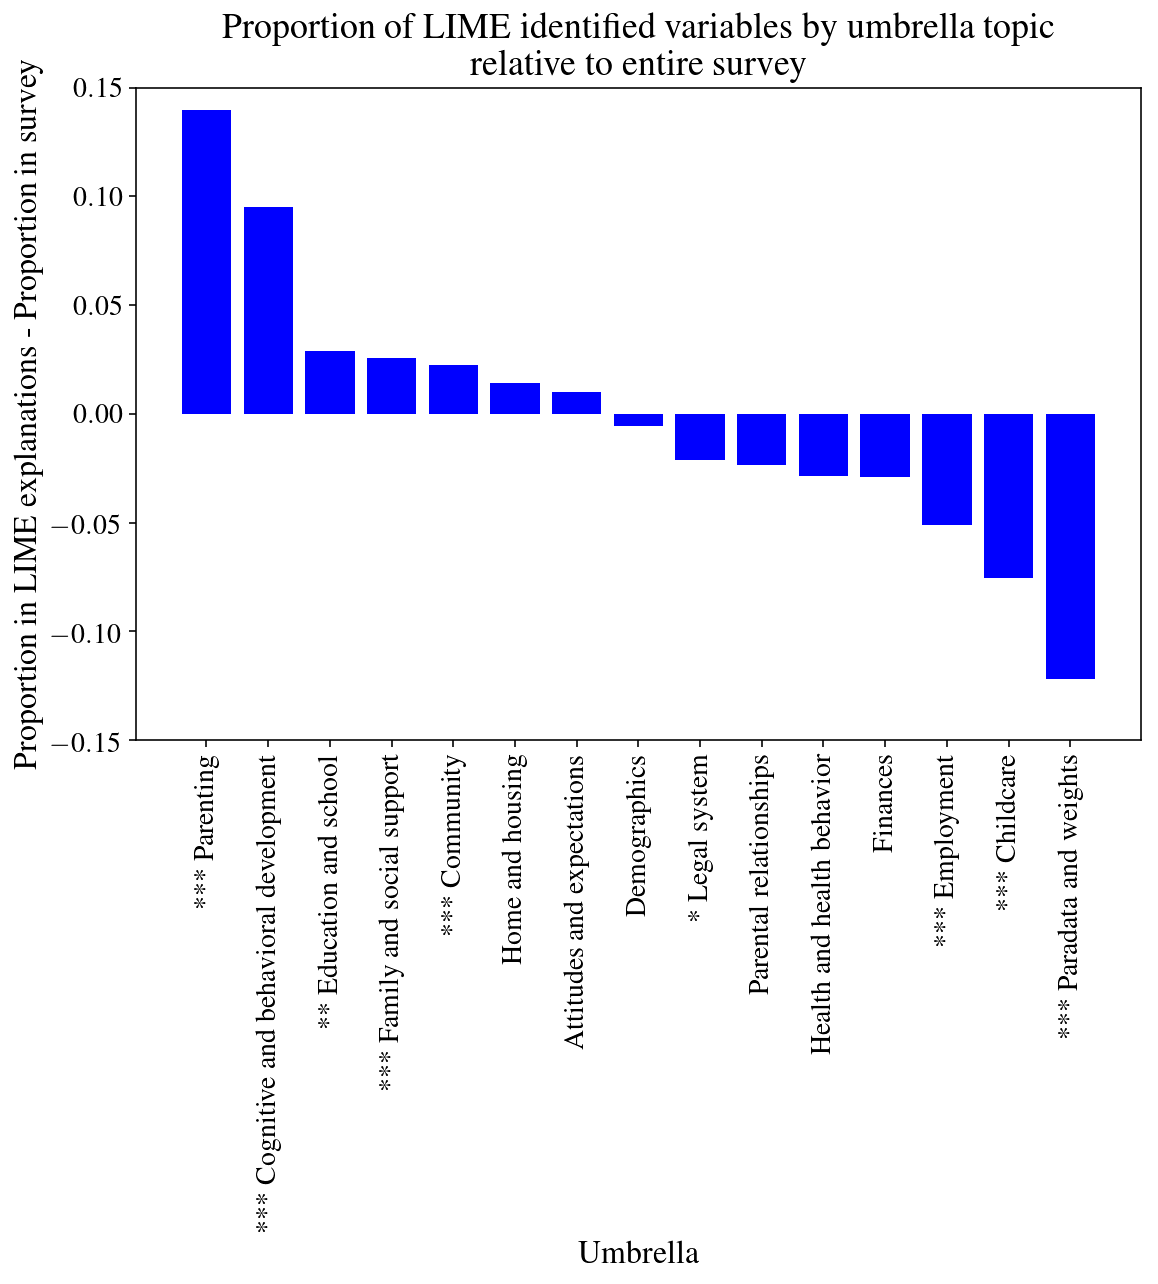

In [345]:
data = list(sorted(umbrella_counts_mod.items(), key=lambda x: x[1],reverse=True))
word, freq = zip(*data)
indices = np.arange(len(data))
plt.bar(indices, freq, color='blue')
plt.xticks(indices, [signif[x]+' '+x for x in word], rotation='vertical',size=14)
plt.title('Proportion of LIME identified variables by umbrella topic \n relative to entire survey',size=18)
plt.ylabel('Proportion in LIME explanations - Proportion in survey',size=16)
plt.xlabel('Umbrella', size=16)
plt.yticks(size=14)
plt.ylim(-0.15,0.15)
plt.show()

Health and health behavior
0.065
Family and social support
0.000
Education and school
0.009
Community
0.000
Parenting
0.000
Cognitive and behavioral development
0.000
Finances
0.068
Parental relationships
0.061
Home and housing
0.313
Employment
0.000
Attitudes and expectations
0.145
Childcare
0.000
Paradata and weights
0.000
Demographics
0.412
Legal system
0.010


In [329]:
umbrella_count_full

{'Attitudes and expectations': 366,
 'Childcare': 1438,
 'Cognitive and behavioral development': 872,
 'Community': 209,
 'Demographics': 363,
 'Education and school': 966,
 'Employment': 1495,
 'Family and social support': 372,
 'Finances': 2228,
 'Health and health behavior': 2099,
 'Home and housing': 1597,
 'Legal system': 544,
 'Paradata and weights': 2331,
 'Parental relationships': 1281,
 'Parenting': 1387}

The questions and their answers can now be manually looked up in the FF codebook to determine whether there are differences between the high and low respondents.